In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import pandas as pd
import matplotlib.pyplot as plt

## Читаем датасет из экселя

In [2]:
df = pd.read_excel('oplogs (1).xlsx')
df = df.sort_values(by='user_time')
df

,platform_type,user_id,session_id,user_time,country,version,event_name,param_1,param_2,extra_1,extra_2,level
0,android,1000001,a1000001ES1,2023-02-01 08:00:02,ES,1.01,app_install_start,0.0,NaN,organic,NaN,0
1,android,1000001,a1000001ES1,2023-02-01 08:00:02,ES,1.01,performance,27.0,NaN,samsung,galaxy a52,0
2,android,1000001,a1000001ES1,2023-02-01 08:01:16,ES,1.01,app_install_finish,74.0,NaN,NaN,NaN,0
3,android,1000001,a1000001ES1,2023-02-01 08:01:42,ES,1.01,loading_finish,26.0,NaN,NaN,NaN,0
4,android,1000001,a1000001ES1,2023-02-01 08:01:42,ES,1.01,tutorial_step_start,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30533,iOS,1002456,i1002456RU3,2023-02-17 10:15:57,RU,1.02,res_movement_outc,3.0,12.0,token,stage_start,11
30534,iOS,1002456,i1002456RU3,2023-02-17 10:15:57,RU,1.02,stage_start,1.0,3.0,gold_loc,NaN,11
30535,iOS,1002456,i1002456RU3,2023-02-17 10:16:56,RU,1.02,stage_win,1.0,3.0,gold_loc,NaN,11
30537,iOS,1002456,i1002456RU3,2023-02-17 10:16:56,RU,1.02,res_movement_inc,500.0,4050.0,gold,stage_win,12


In [3]:
df.dtypes

platform_type            object
user_id                   int64
session_id               object
user_time        datetime64[ns]
country                  object
version                 float64
event_name               object
param_1                 float64
param_2                 float64
extra_1                  object
extra_2                  object
level                     int64
dtype: object

## Cоздаем таблицу user_info из df

In [4]:
user_info = df.groupby('user_id').agg(
    platform_type = ('platform_type', 'first'),
    country = ('country', 'first'),
    first_version = ('version', 'first'),
    last_version = ('version', 'last'),
    type_trafic = ('extra_1', lambda x: x[df['event_name'] == 'app_install_start']),
    first_time = ('user_time', 'min'),
    last_time = ('user_time', 'max'),
    dates = ('user_time', lambda x: list(x.dt.date.unique())),
    payer = ('event_name', lambda x: 1 if 'purchase' in x.values else 0),
    total_revenue = ('param_2', lambda x: x[df['event_name'] == 'purchase'].sum()),  
    max_level = ('level', 'max'),
    amount_gold = ('param_2', lambda x: x[df['event_name'] == 'res_movement_inc'].max()), 
    amount_bronze_cup = ('extra_2', lambda x: x[df['extra_2'] == 'bronze_cup'].count()),  
    amount_silver_cup = ('extra_2', lambda x: x[df['extra_2'] == 'silver_cup'].count()),  
    amount_gold_cup = ('extra_2', lambda x: x[df['extra_2'] == 'gold_cup'].count())  
).reset_index()
user_info

,user_id,platform_type,country,first_version,last_version,type_trafic,first_time,last_time,dates,payer,total_revenue,max_level,amount_gold,amount_bronze_cup,amount_silver_cup,amount_gold_cup
0,1000001,android,ES,1.01,1.01,organic,2023-02-01 08:00:02,2023-02-01 08:02:05,[2023-02-01],0,0.0,0,NaN,0,0,0
1,1000004,android,RU,1.01,1.01,organic,2023-02-01 08:29:34,2023-02-01 08:30:42,[2023-02-01],0,0.0,0,NaN,0,0,0
2,1000006,iOS,CA,1.01,1.01,organic,2023-02-01 08:47:23,2023-02-01 08:50:14,[2023-02-01],0,0.0,2,650.0,0,0,0
3,1000007,android,GE,1.01,1.01,organic,2023-02-01 08:49:45,2023-02-01 08:51:12,[2023-02-01],0,0.0,0,NaN,0,0,0
4,1000008,iOS,RU,1.01,1.01,organic,2023-02-01 09:03:20,2023-02-02 08:45:35,"[2023-02-01, 2023-02-02]",0,0.0,10,3050.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1002492,android,PL,1.02,1.02,paid,2023-02-15 16:40:28,2023-02-15 16:41:45,[2023-02-15],0,0.0,0,NaN,0,0,0
1378,1002495,android,GE,1.02,1.02,organic,2023-02-15 17:13:19,2023-02-15 17:14:28,[2023-02-15],0,0.0,0,NaN,0,0,0
1379,1002497,android,BY,1.02,1.02,organic,2023-02-15 17:26:46,2023-02-15 17:30:33,[2023-02-15],0,0.0,2,650.0,0,0,0
1380,1002498,android,RU,1.02,1.02,organic,2023-02-15 17:31:00,2023-02-15 18:39:24,[2023-02-15],0,0.0,6,1150.0,1,0,0


In [5]:
user_info.dtypes

user_id                       int64
platform_type                object
country                      object
first_version               float64
last_version                float64
type_trafic                  object
first_time           datetime64[ns]
last_time            datetime64[ns]
dates                        object
payer                         int64
total_revenue               float64
max_level                     int64
amount_gold                 float64
amount_bronze_cup             int64
amount_silver_cup             int64
amount_gold_cup               int64
dtype: object

In [6]:
user_info[user_info['first_version'] != user_info['last_version']][['user_id', 'first_version', 'last_version']]

,user_id,first_version,last_version


In [7]:
user_info[user_info['amount_silver_cup'] > 1]

,user_id,platform_type,country,first_version,last_version,type_trafic,first_time,last_time,dates,payer,total_revenue,max_level,amount_gold,amount_bronze_cup,amount_silver_cup,amount_gold_cup


## Cоздаем таблицу user_session из df

In [8]:
user_session = df.groupby('session_id').agg(
    platform_type = ('platform_type', 'first'),
    user_id = ('user_id', 'first'),
    version = ('version', 'first'),
    time_start_session = ('user_time', lambda x: x[df['event_name'] == 'loading_finish'].min()), 
    time_finish_session = ('user_time', 'max'),  
    length_session = ('user_time', lambda x: (x.max() - x[df['event_name'] == 'loading_finish'].min()).total_seconds()), 
    amount_get_level = ('level','nunique'),  
    amount_get_gold = ('param_2', lambda x: x[df['event_name'] == 'res_movement_inc'].sum()),  
    amount_get_bronze_cup = ('extra_2', lambda x: x[df['extra_2'] == 'bronze_cup'].count()),  
    amount_get_silver_cup = ('extra_2', lambda x: x[df['extra_2'] == 'silver_cup'].count()), 
    amount_get_gold_cup = ('extra_2', lambda x: x[df['extra_2'] == 'gold_cup'].count())
).reset_index()

user_session['session_number'] = user_session.groupby('user_id').cumcount() + 1
user_session

,session_id,platform_type,user_id,version,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,session_number
0,a1000001ES1,android,1000001,1.01,2023-02-01 08:01:42,2023-02-01 08:02:05,23.0,1,0.0,0,0,0,1
1,a1000004RU1,android,1000004,1.01,2023-02-01 08:30:42,2023-02-01 08:30:42,0.0,1,0.0,0,0,0,1
2,a1000007GE1,android,1000007,1.01,2023-02-01 08:51:00,2023-02-01 08:51:12,12.0,1,0.0,0,0,0,1
3,a1000009LT1,android,1000009,1.01,2023-02-01 09:10:25,2023-02-01 09:10:36,11.0,1,0.0,0,0,0,1
4,a1000011CA1,android,1000011,1.01,2023-02-01 09:22:37,2023-02-01 09:22:57,20.0,1,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,i1002464GE1,iOS,1002464,1.02,2023-02-15 12:42:56,2023-02-15 12:43:03,7.0,1,0.0,0,0,0,1
1562,i1002465RU1,iOS,1002465,1.02,2023-02-15 12:56:48,2023-02-15 13:00:30,222.0,5,2860.0,0,0,0,1
1563,i1002466DE1,iOS,1002466,1.02,2023-02-15 12:59:09,2023-02-15 12:59:18,9.0,1,0.0,0,0,0,1
1564,i1002479CA1,iOS,1002479,1.02,2023-02-15 14:47:35,2023-02-15 14:47:45,10.0,1,0.0,0,0,0,1


In [9]:
user_session.dtypes

session_id                       object
platform_type                    object
user_id                           int64
version                         float64
time_start_session       datetime64[ns]
time_finish_session      datetime64[ns]
length_session                  float64
amount_get_level                  int64
amount_get_gold                 float64
amount_get_bronze_cup             int64
amount_get_silver_cup             int64
amount_get_gold_cup               int64
session_number                    int64
dtype: object

In [10]:
user_session[user_session['session_number'] > 3]

,session_id,platform_type,user_id,version,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,session_number


## Cоздаем таблицу user_payments из df

In [11]:
user_payments = df.groupby('user_id').agg(
    platform_type=('platform_type', 'first'),
    session_id=('session_id', 'first'),
    version=('version', 'first'),
    country = ('country', 'first'),
    purchase_number = ('param_2', lambda x: x[df['event_name'] == 'purchase'].count()),
    purchase_time=('user_time', lambda x: x[df['event_name'] == 'purchase'].min()),
    item=('extra_1', lambda x: x[df['event_name'] == 'purchase'].min()),  
    offer_id = ('extra_2', lambda x: x[df['extra_1'].isin(['shop', 'offer', 'subscription'])].min()),
    price=('param_2', lambda x: x[df['event_name'] == 'purchase'].min()),
    level=('level', lambda x: x[df['event_name'] == 'purchase'].min()) 
).reset_index()
user_payments

,user_id,platform_type,session_id,version,country,purchase_number,purchase_time,item,offer_id,price,level
0,1000001,android,a1000001ES1,1.01,ES,0,NaT,NaN,NaN,NaN,NaN
1,1000004,android,a1000004RU1,1.01,RU,0,NaT,NaN,NaN,NaN,NaN
2,1000006,iOS,i1000006CA1,1.01,CA,0,NaT,NaN,NaN,NaN,NaN
3,1000007,android,a1000007GE1,1.01,GE,0,NaT,NaN,NaN,NaN,NaN
4,1000008,iOS,i1000008RU1,1.01,RU,0,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1377,1002492,android,a1002492PL1,1.02,PL,0,NaT,NaN,NaN,NaN,NaN
1378,1002495,android,a1002495GE1,1.02,GE,0,NaT,NaN,NaN,NaN,NaN
1379,1002497,android,a1002497BY1,1.02,BY,0,NaT,NaN,NaN,NaN,NaN
1380,1002498,android,a1002498RU1,1.02,RU,0,NaT,NaN,NaN,NaN,NaN


In [12]:
user_payments.dtypes

user_id                     int64
platform_type              object
session_id                 object
version                   float64
country                    object
purchase_number             int64
purchase_time      datetime64[ns]
item                       object
offer_id                  float64
price                     float64
level                     float64
dtype: object

In [13]:
user_payments[user_payments['purchase_number'] > 1][['user_id','purchase_number']]

,user_id,purchase_number


In [14]:
user_payments['price'].describe()

count    36.000000
mean      2.934444
std       1.308094
min       0.990000
25%       1.990000
50%       2.990000
75%       3.990000
max       4.990000
Name: price, dtype: float64

## Построение системы метрик дохода пользователей, конверсии и структуры покупок (2 вариант)

In [15]:
# Расчет кол-ва уникальных юзеров
cnt_user = user_payments['user_id'].count()
print(f'Общее кол-во пользователей: {cnt_user}')

# Расчет кол-ва платящих юзеров
paying_users = user_payments[user_payments['purchase_number'] > 0]['user_id'].nunique()
print(f'Общее кол-во платящих пользователей: {paying_users}')

# Расчет кол-ва покупок 
cnt_purchase = user_payments['purchase_number'].sum()
print(f'Общее кол-во покупок: {cnt_purchase}')

# Расчет общего дохода
total_revenue = user_payments['price'].sum()
print(f'Общий доход: {total_revenue:.2f}')

# Расчет среднего дохода на пользователя (ARPU)
unique_users = user_payments['user_id'].nunique()
arpu = total_revenue / unique_users
print(f'Средний доход на пользователя (ARPU): {arpu:.2f}')

# Расчет среднего дохода на платящего пользователя (ARPPU)
arppu = total_revenue / paying_users
print(f'Средний доход на платящего пользователя (ARPPU): {arppu:.2f}')

# Расчет конверсии
unique_users = user_payments['user_id'].nunique()
purchasing_users = user_payments[user_payments['purchase_number'] > 0]['user_id'].nunique()
conversion_rate = purchasing_users / unique_users * 100
print(f'Конверсия: {conversion_rate:.1f}%')

# Среднее кол-во покупок на пользователя:
APC = cnt_purchase / cnt_user
print(f'Среднее кол-во покупок на пользователя: {APC:.3f}')

# Доля платящих пользователей
paying_share = paying_users / cnt_user
print(f'Доля платящих пользователей: {paying_share:.2f}')

Общее кол-во пользователей: 1382
Общее кол-во платящих пользователей: 36
Общее кол-во покупок: 36
Общий доход: 105.64
Средний доход на пользователя (ARPU): 0.08
Средний доход на платящего пользователя (ARPPU): 2.93
Конверсия: 2.6%
Среднее кол-во покупок на пользователя: 0.026
Доля платящих пользователей: 0.03


In [16]:
# Расчет кол-ва пользователей по платформам
user_by_platform = user_payments.groupby('platform_type')['user_id'].count().reset_index()
user_by_platform

,platform_type,user_id
0,android,842
1,iOS,540


In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
plt.style.use('ggplot')

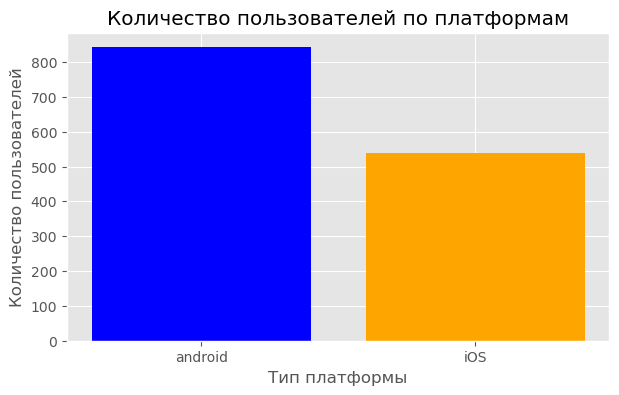

In [19]:
plt.figure(figsize=(7, 4))
plt.bar(user_by_platform['platform_type'], user_by_platform['user_id'], color=['blue', 'orange'])
plt.title('Количество пользователей по платформам')
plt.xlabel('Тип платформы')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

In [20]:
# Расчет дохода по платформам
revenue_by_platform = user_payments.groupby('platform_type')['price'].sum().reset_index()
revenue_by_platform = revenue_by_platform.rename(columns = {'price': 'total_revenue'})
revenue_by_platform

,platform_type,total_revenue
0,android,56.79
1,iOS,48.85


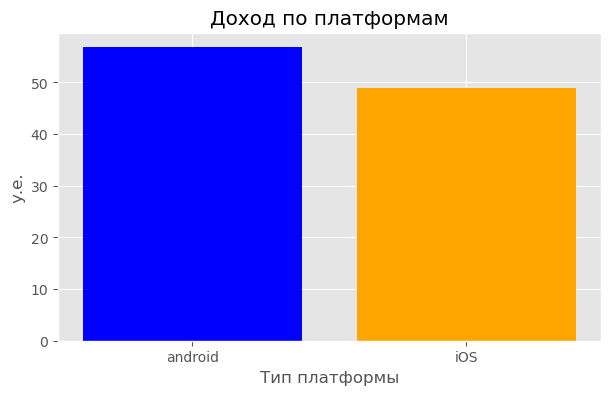

In [21]:
plt.figure(figsize=(7, 4))
plt.bar(revenue_by_platform['platform_type'], revenue_by_platform['total_revenue'], color=['blue', 'orange'])
plt.title('Доход по платформам')
plt.xlabel('Тип платформы')
plt.ylabel('у.е.')
plt.show()

In [22]:
# Доход по времени (по дням)
daily_revenue = user_payments.groupby(user_payments['purchase_time'].dt.date)['price'].sum().reset_index()
daily_revenue = daily_revenue.rename(columns = {'price': 'daily_revenue'})
daily_revenue

,purchase_time,daily_revenue
0,2023-02-02,7.97
1,2023-02-03,1.99
2,2023-02-04,10.96
3,2023-02-05,20.93
4,2023-02-06,4.99
5,2023-02-08,7.97
6,2023-02-09,7.97
7,2023-02-10,8.98
8,2023-02-11,11.96
9,2023-02-12,2.99


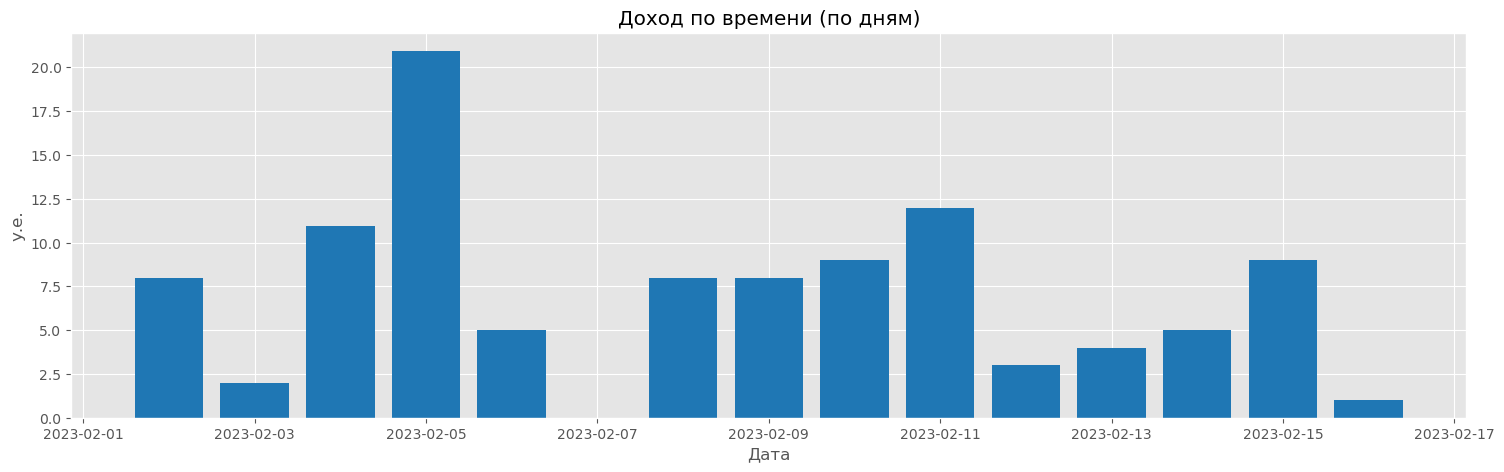

In [23]:
plt.figure(figsize=(18, 5))
plt.bar(daily_revenue['purchase_time'], daily_revenue['daily_revenue'], color=['tab:blue'])
plt.title('Доход по времени (по дням)')
plt.xlabel('Дата')
plt.ylabel('у.е.')
plt.show()

In [24]:
# Расчет структуры покупок
purchase_structure = user_payments.groupby('item')['purchase_number'].sum().reset_index()
purchase_structure = purchase_structure.rename(columns = {'purchase_number': 'total_purchases'})
purchase_structure

,item,total_purchases
0,offer,9
1,shop,24
2,subscription,3


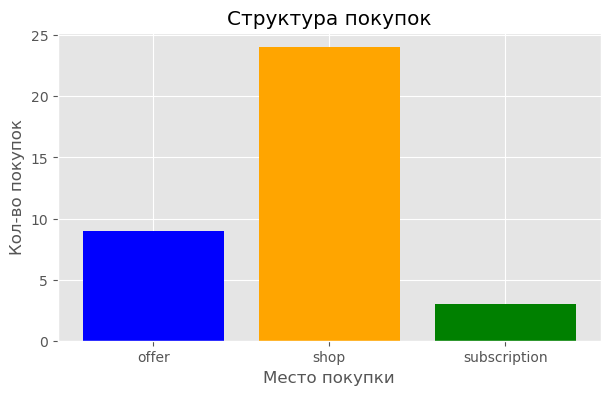

In [25]:
plt.figure(figsize=(7, 4))
plt.bar(purchase_structure['item'], purchase_structure['total_purchases'], color=['blue', 'orange', 'green'])
plt.title('Структура покупок')
plt.xlabel('Место покупки')
plt.ylabel('Кол-во покупок')
plt.show()

In [26]:
# Расчет дохода структуры покупок
purchase_structure_revenue = user_payments.groupby('item')['price'].sum().reset_index()
purchase_structure_revenue = purchase_structure_revenue.rename(columns={'price': 'total_revenue'})
purchase_structure_revenue

,item,total_revenue
0,offer,26.91
1,shop,63.76
2,subscription,14.97


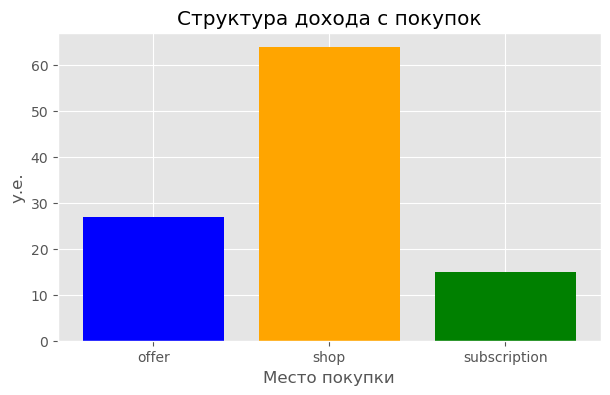

In [27]:
plt.figure(figsize=(7, 4))
plt.bar(purchase_structure_revenue['item'], purchase_structure_revenue['total_revenue'], color=['blue', 'orange', 'green'])
plt.title('Структура дохода с покупок')
plt.xlabel('Место покупки')
plt.ylabel('у.е.')
plt.show()

In [28]:
# Расчет дохода по пользователям
revenue_per_user = user_payments.groupby('user_id')['price'].sum().reset_index()
revenue_per_user = revenue_per_user.rename(columns = {'price': 'total_revenue'})
revenue_per_user = revenue_per_user[revenue_per_user['total_revenue'] > 0]
item_per_user = user_payments.groupby('user_id')['item'].unique()
revenue_per_user = revenue_per_user.merge(item_per_user, on='user_id', how='left')
revenue_per_user

,user_id,total_revenue,item
0,1000028,0.99,[shop]
1,1000079,2.99,[offer]
2,1000208,3.99,[shop]
3,1000358,2.99,[offer]
4,1000399,1.99,[shop]
5,1000444,2.99,[offer]
6,1000449,0.99,[shop]
7,1000521,3.99,[shop]
8,1000629,0.99,[shop]
9,1000660,1.99,[shop]


In [29]:
# Расчет кол-ва пользователей по странам
user_by_country = user_payments.groupby('country')['user_id'].count().reset_index()
user_by_country = user_by_country.rename(columns = {'user_id': 'total_users'})
user_by_country = user_by_country.sort_values(by = 'total_users', ascending = False)
user_by_country

,country,total_users
11,RU,390
12,US,204
6,KZ,154
2,DE,115
10,PL,106
4,GE,76
0,BY,74
5,IT,72
3,ES,71
1,CA,56


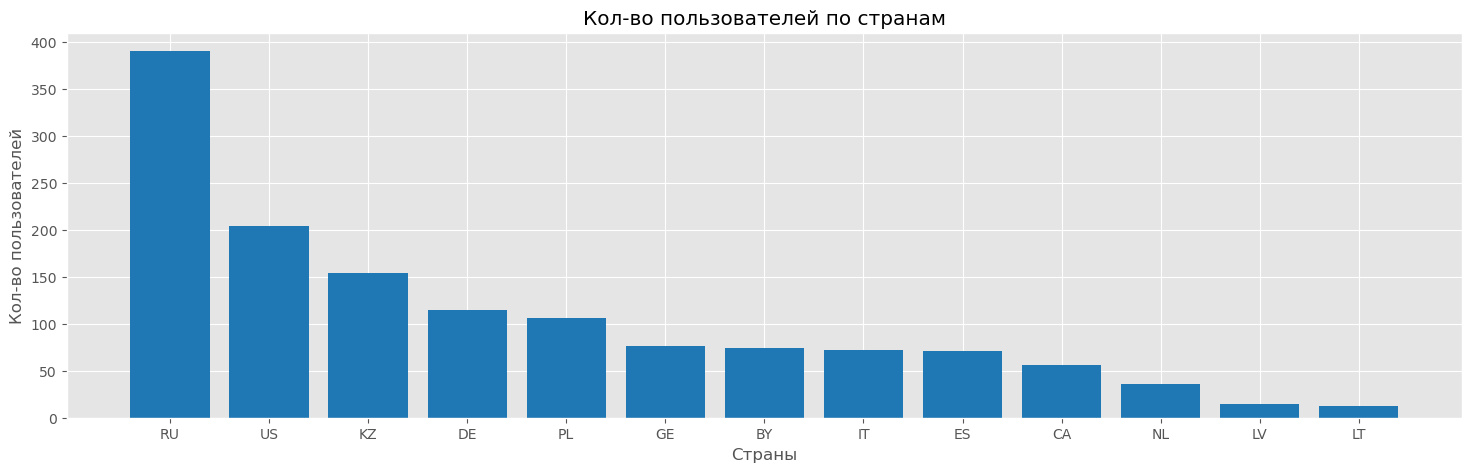

In [30]:
plt.figure(figsize=(18, 5))
plt.bar(user_by_country['country'], user_by_country['total_users'], color = 'tab:blue')
plt.title('Кол-во пользователей по странам')
plt.xlabel('Страны')
plt.ylabel('Кол-во пользователей')
plt.show()

In [31]:
# Расчет дохода по странам
revenue_by_country = user_payments.groupby('country')['price'].sum().reset_index()
revenue_by_country = revenue_by_country.rename(columns = {'price': 'total_revenue'})
revenue_by_country = revenue_by_country.sort_values(by = 'total_revenue', ascending = False)
revenue_by_country

,country,total_revenue
11,RU,32.90
12,US,26.92
10,PL,8.97
5,IT,7.98
3,ES,7.97
0,BY,6.98
2,DE,4.98
6,KZ,2.98
1,CA,1.99
4,GE,1.99


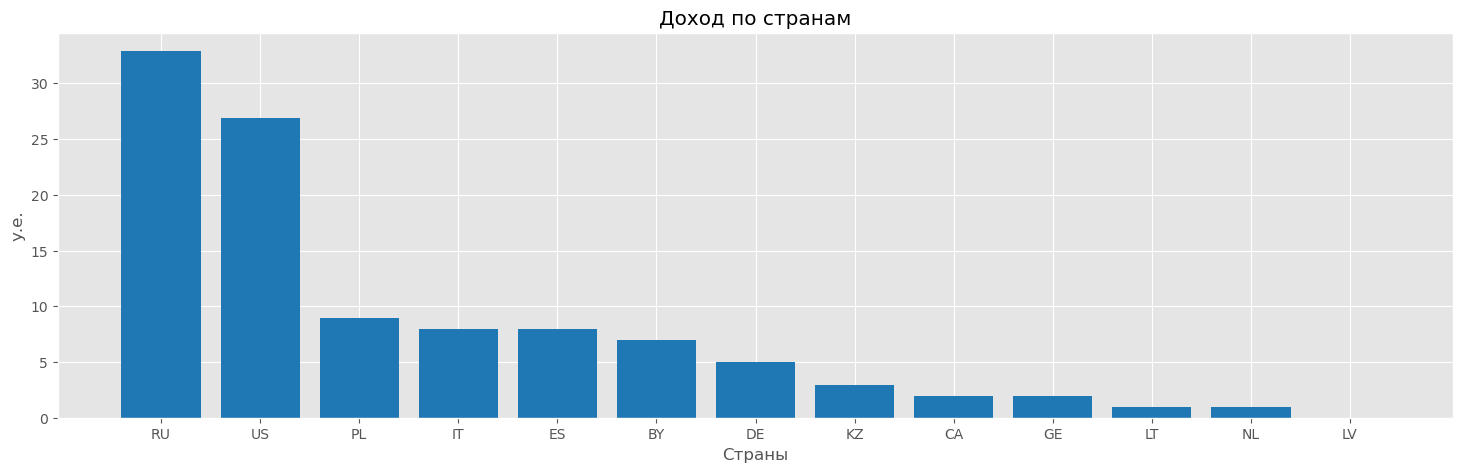

In [32]:
plt.figure(figsize=(18, 5))
plt.bar(revenue_by_country['country'], revenue_by_country['total_revenue'], color = 'tab:blue')
plt.title('Доход по странам')
plt.xlabel('Страны')
plt.ylabel('у.е.')
plt.show()

In [33]:
# Подсчет кол-ва покупок по уровням
purchases_by_level = user_payments.groupby('level')['purchase_number'].sum().reset_index()
purchases_by_level = purchases_by_level.rename(columns = {'purchase_number': 'total_purchases'})
purchases_by_level

,level,total_purchases
0,2.0,7
1,3.0,8
2,5.0,4
3,8.0,9
4,9.0,8


In [34]:
# Подсчет суммы покупок по уровням
revenue_by_level = user_payments.groupby('level')['price'].sum().reset_index()
revenue_by_level = revenue_by_level.rename(columns = {'price': 'total_revenue'})
revenue_by_level

,level,total_revenue
0,2.0,30.93
1,3.0,31.92
2,5.0,7.96
3,8.0,26.91
4,9.0,7.92


In [35]:
amount_by_level = pd.merge(revenue_by_level, purchases_by_level, on='level', how='left')
amount_by_level

,level,total_revenue,total_purchases
0,2.0,30.93,7
1,3.0,31.92,8
2,5.0,7.96,4
3,8.0,26.91,9
4,9.0,7.92,8


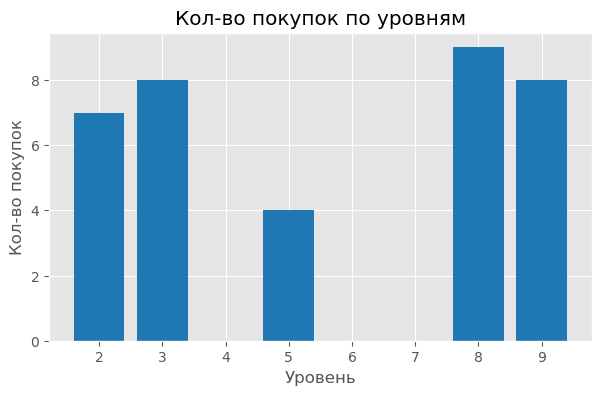

In [36]:
plt.figure(figsize=(7, 4))
plt.bar(purchases_by_level['level'], purchases_by_level['total_purchases'], color = 'tab:blue')
plt.title('Кол-во покупок по уровням')
plt.xlabel('Уровень')
plt.ylabel('Кол-во покупок')
plt.show()

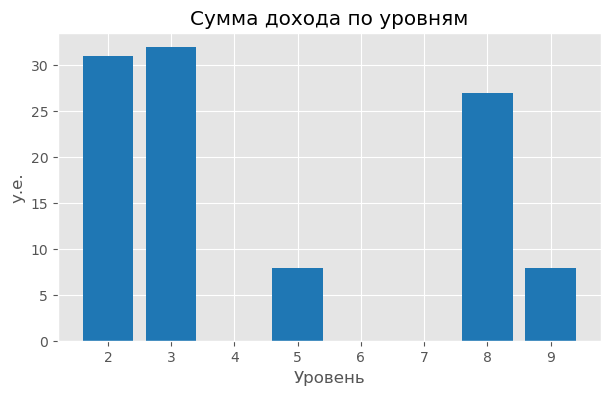

In [37]:
plt.figure(figsize=(7, 4))
plt.bar(revenue_by_level['level'], revenue_by_level['total_revenue'], color = 'tab:blue')
plt.title('Сумма дохода по уровням')
plt.xlabel('Уровень')
plt.ylabel('у.е.')
plt.show()

In [38]:
# Объединение структуры покупок по уровням
final_structure = user_payments.groupby(['level', 'item']).size().unstack(fill_value=0)
final_structure

item,offer,shop,subscription
level,,,
2.0,0,4,3
3.0,0,8,0
5.0,0,4,0
8.0,9,0,0
9.0,0,8,0


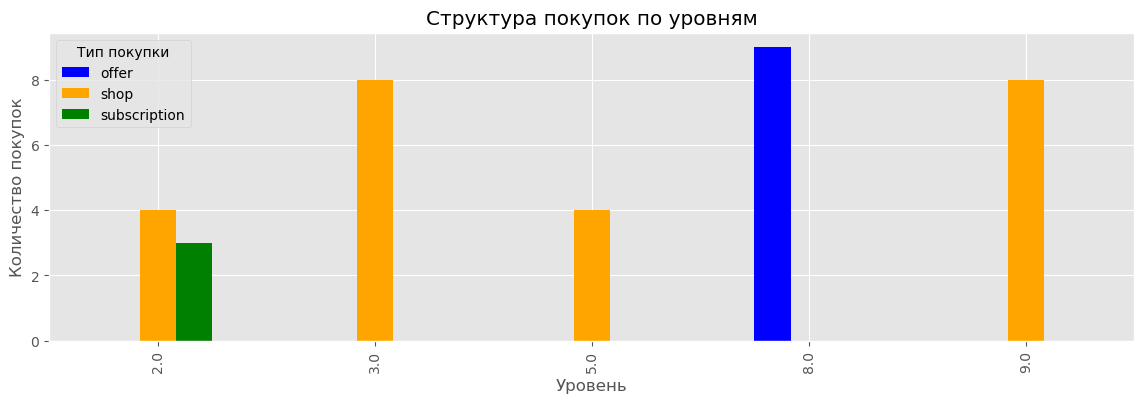

In [39]:
final_structure.plot(kind='bar', figsize=(14, 4), color=['blue', 'orange', 'green'])
plt.title('Структура покупок по уровням')
plt.xlabel('Уровень')
plt.ylabel('Количество покупок')
plt.legend(title='Тип покупки')
plt.show()

## Построение системы метрик первой сессии, удержания, аудитории проекта (1 вариант)

In [40]:
user_session.head()

,session_id,platform_type,user_id,version,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,session_number
0,a1000001ES1,android,1000001,1.01,2023-02-01 08:01:42,2023-02-01 08:02:05,23.0,1,0.0,0,0,0,1
1,a1000004RU1,android,1000004,1.01,2023-02-01 08:30:42,2023-02-01 08:30:42,0.0,1,0.0,0,0,0,1
2,a1000007GE1,android,1000007,1.01,2023-02-01 08:51:00,2023-02-01 08:51:12,12.0,1,0.0,0,0,0,1
3,a1000009LT1,android,1000009,1.01,2023-02-01 09:10:25,2023-02-01 09:10:36,11.0,1,0.0,0,0,0,1
4,a1000011CA1,android,1000011,1.01,2023-02-01 09:22:37,2023-02-01 09:22:57,20.0,1,0.0,0,0,0,1


In [41]:
user_session[user_session['length_session'] == 0]

,session_id,platform_type,user_id,version,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,session_number
1,a1000004RU1,android,1000004,1.01,2023-02-01 08:30:42,2023-02-01 08:30:42,0.0,1,0.0,0,0,0,1
21,a1000053IT1,android,1000053,1.01,2023-02-01 15:06:54,2023-02-01 15:06:54,0.0,1,0.0,0,0,0,1
22,a1000054ES1,android,1000054,1.01,2023-02-01 15:16:38,2023-02-01 15:16:38,0.0,1,0.0,0,0,0,1
23,a1000055KZ1,android,1000055,1.01,2023-02-01 15:20:18,2023-02-01 15:20:18,0.0,1,0.0,0,0,0,1
29,a1000068RU1,android,1000068,1.01,2023-02-01 16:53:02,2023-02-01 16:53:02,0.0,1,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,i1002320DE1,iOS,1002320,1.02,2023-02-14 16:43:57,2023-02-14 16:43:57,0.0,1,0.0,0,0,0,1
1532,i1002344RU1,iOS,1002344,1.02,2023-02-14 19:53:22,2023-02-14 19:53:22,0.0,1,0.0,0,0,0,1
1538,i1002370PL1,iOS,1002370,1.02,2023-02-14 23:17:44,2023-02-14 23:17:44,0.0,1,0.0,0,0,0,1
1540,i1002388KZ1,iOS,1002388,1.02,2023-02-15 02:02:00,2023-02-15 02:02:00,0.0,1,0.0,0,0,0,1


In [42]:
first_session = df.groupby('session_id').agg(
    user_id = ('user_id', 'first'),
    platform_type=('platform_type', 'first'),
    type_trafic = ('extra_1', lambda x: x[df['event_name'] == 'app_install_start']),
    time_start_session = ('user_time', lambda x: x[df['event_name'] == 'loading_finish'].min()), 
    time_finish_session = ('user_time', 'max'),  
    length_session = ('user_time', lambda x: (x.max() - x[df['event_name'] == 'loading_finish'].min()).total_seconds()), 
    amount_get_level = ('level','nunique'),  
    amount_get_gold = ('param_2', lambda x: x[df['event_name'] == 'res_movement_inc'].sum()),  
    amount_get_bronze_cup = ('extra_2', lambda x: x[df['extra_2'] == 'bronze_cup'].count()),  
    amount_get_silver_cup = ('extra_2', lambda x: x[df['extra_2'] == 'silver_cup'].count()), 
    amount_get_gold_cup = ('extra_2', lambda x: x[df['extra_2'] == 'gold_cup'].count()),
    level_cnt_tut = ('param_1', lambda x: x[df['event_name'] == 'tutorial_step_start'].nunique()),
    error = ('event_name', lambda x: x[df['event_name'] == 'error_window'].min()),
    error_name = ('extra_1', lambda x: x[df['event_name'] == 'error_window'].min()),
    error_time = ('user_time', lambda x: x[df['event_name'] == 'error_window'].min()),
    fps = ('param_1', lambda x: x[df['event_name'] == 'performance'].min()),
    ).reset_index()
first_session = first_session[first_session['session_id'].astype(str).str.endswith('1')][['user_id', 
                                                                                          'session_id', 
                                                                                          'platform_type', 
                                                                                          'type_trafic', 
                                                                                          'time_start_session', 
                                                                                          'time_finish_session', 
                                                                                          'length_session', 
                                                                                          'amount_get_level', 
                                                                                          'amount_get_gold',
                                                                                          'amount_get_bronze_cup',
                                                                                          'amount_get_silver_cup',
                                                                                          'amount_get_gold_cup',
                                                                                          'level_cnt_tut',
                                                                                          'error',
                                                                                          'error_time',
                                                                                          'error_name',
                                                                                          'fps'
                                                                                         ]]
first_session

,user_id,session_id,platform_type,type_trafic,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,level_cnt_tut,error,error_time,error_name,fps
0,1000001,a1000001ES1,android,organic,2023-02-01 08:01:42,2023-02-01 08:02:05,23.0,1,0.0,0,0,0,5,NaN,NaT,NaN,27.0
1,1000004,a1000004RU1,android,organic,2023-02-01 08:30:42,2023-02-01 08:30:42,0.0,1,0.0,0,0,0,1,NaN,NaT,NaN,49.0
2,1000007,a1000007GE1,android,organic,2023-02-01 08:51:00,2023-02-01 08:51:12,12.0,1,0.0,0,0,0,2,error_window,2023-02-01 08:51:12,network_error,24.0
3,1000009,a1000009LT1,android,paid,2023-02-01 09:10:25,2023-02-01 09:10:36,11.0,1,0.0,0,0,0,3,NaN,NaT,NaN,33.0
4,1000011,a1000011CA1,android,organic,2023-02-01 09:22:37,2023-02-01 09:22:57,20.0,1,0.0,0,0,0,3,error_window,2023-02-01 09:22:57,klient_error,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,1002464,i1002464GE1,iOS,organic,2023-02-15 12:42:56,2023-02-15 12:43:03,7.0,1,0.0,0,0,0,3,NaN,NaT,NaN,53.0
1562,1002465,i1002465RU1,iOS,organic,2023-02-15 12:56:48,2023-02-15 13:00:30,222.0,5,2860.0,0,0,0,7,NaN,NaT,NaN,45.0
1563,1002466,i1002466DE1,iOS,organic,2023-02-15 12:59:09,2023-02-15 12:59:18,9.0,1,0.0,0,0,0,3,NaN,NaT,NaN,37.0
1564,1002479,i1002479CA1,iOS,organic,2023-02-15 14:47:35,2023-02-15 14:47:45,10.0,1,0.0,0,0,0,2,error_window,2023-02-15 14:47:45,network_error,24.0


In [43]:
first_session

,user_id,session_id,platform_type,type_trafic,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,level_cnt_tut,error,error_time,error_name,fps
0,1000001,a1000001ES1,android,organic,2023-02-01 08:01:42,2023-02-01 08:02:05,23.0,1,0.0,0,0,0,5,NaN,NaT,NaN,27.0
1,1000004,a1000004RU1,android,organic,2023-02-01 08:30:42,2023-02-01 08:30:42,0.0,1,0.0,0,0,0,1,NaN,NaT,NaN,49.0
2,1000007,a1000007GE1,android,organic,2023-02-01 08:51:00,2023-02-01 08:51:12,12.0,1,0.0,0,0,0,2,error_window,2023-02-01 08:51:12,network_error,24.0
3,1000009,a1000009LT1,android,paid,2023-02-01 09:10:25,2023-02-01 09:10:36,11.0,1,0.0,0,0,0,3,NaN,NaT,NaN,33.0
4,1000011,a1000011CA1,android,organic,2023-02-01 09:22:37,2023-02-01 09:22:57,20.0,1,0.0,0,0,0,3,error_window,2023-02-01 09:22:57,klient_error,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,1002464,i1002464GE1,iOS,organic,2023-02-15 12:42:56,2023-02-15 12:43:03,7.0,1,0.0,0,0,0,3,NaN,NaT,NaN,53.0
1562,1002465,i1002465RU1,iOS,organic,2023-02-15 12:56:48,2023-02-15 13:00:30,222.0,5,2860.0,0,0,0,7,NaN,NaT,NaN,45.0
1563,1002466,i1002466DE1,iOS,organic,2023-02-15 12:59:09,2023-02-15 12:59:18,9.0,1,0.0,0,0,0,3,NaN,NaT,NaN,37.0
1564,1002479,i1002479CA1,iOS,organic,2023-02-15 14:47:35,2023-02-15 14:47:45,10.0,1,0.0,0,0,0,2,error_window,2023-02-15 14:47:45,network_error,24.0


In [44]:
# Количество новых пользователей за 14 дней
cnt_session = first_session['session_id'].count()
print(f'Количество новых пользователей за 14 дней: {cnt_session}')

# Расчет средней продолжительности первой сессии
avg_lenght_session = first_session['length_session'].mean()
print(f'Cредняя продолжительность первой сессии: {avg_lenght_session:.2f} секунд')

# Расчет средней продолжительности первой сессии (без учета 0)
filtered_sessions = first_session[first_session['length_session'] > 0]
avg_lenght_session_0 = filtered_sessions['length_session'].mean()
print(f'Cредняя продолжительность первой сессии: (без учета 0): {avg_lenght_session_0:.2f} секунд')

# Общее количество уровней полученных в первой сессии
total_levels = first_session['amount_get_level'].sum()
print(f'Общее количество уровней полученных в первой сессии: {total_levels}')

# Среднее количество уровней полученных в первой сессии
avg_levels = first_session['amount_get_level'].mean()
print(f'Среднее количество уровней полученных в первой сессии: {avg_levels:.0f}')

# Общее количество золота полученного в первой сессии
total_gold = first_session['amount_get_gold'].sum()
print(f'Общее количество золота полученного в первой сессии: {total_gold:.2f}')

# Срденее количество золота полученного в первой сессии
average_gold = first_session['amount_get_gold'].mean()
print(f'Срденее количество золота полученного в первой сессии: {average_gold:.2f}')

# Общее количество бронзовых кубков полученных в первой сессии
total_bronze_cups = first_session['amount_get_bronze_cup'].sum()
print(f'Общее количество бронзовых кубков полученных в первой сессии: {total_bronze_cups:.2f}')

# Общее количество серебрянных кубков полученных в первой сессии
total_silver_cups = first_session['amount_get_silver_cup'].sum()
print(f'Общее количество серебрянных кубков полученных в первой сессии: {total_silver_cups:.2f}')

# Общее количество золотых кубков полученных в первой сессии
total_gold_cups = first_session['amount_get_gold_cup'].sum()
print(f'Общее количество золотых кубков полученных в первой сессии: {total_gold_cups:.2f}')

Количество новых пользователей за 14 дней: 1382
Cредняя продолжительность первой сессии: 97.60 секунд
Cредняя продолжительность первой сессии: (без учета 0): 108.54 секунд
Общее количество уровней полученных в первой сессии: 3144
Среднее количество уровней полученных в первой сессии: 2
Общее количество золота полученного в первой сессии: 1423677.00
Срденее количество золота полученного в первой сессии: 1030.16
Общее количество бронзовых кубков полученных в первой сессии: 117.00
Общее количество серебрянных кубков полученных в первой сессии: 0.00
Общее количество золотых кубков полученных в первой сессии: 0.00


In [45]:
# Определяем дату первого дня
first_day = pd.to_datetime('2023-02-01')
# Уникальные пользователи первого дня
users_first_day = first_session[first_session['time_start_session'].dt.date == first_day.date()]['user_id'].unique()
# Уникальные пользователи вернувшиеся на следующий день
next_day = first_day + pd.Timedelta(days=1)
users_next_day = first_session[first_session['time_start_session'].dt.date == next_day.date()]['user_id'].unique()

retention_rate = len(set(users_next_day) & set(users_first_day)) / len(users_first_day) * 100
print(f'Retention на 1 день (с {first_day.date()} на {next_day.date()}): {retention_rate:.2f} %')

# Определяем дату первого дня
first_day = pd.to_datetime('2023-02-01')
# Уникальные пользователи первого дня
users_first_day = first_session[first_session['time_start_session'].dt.date == first_day.date()]['user_id'].unique()
# Уникальные пользователи вернувшиеся на 7 день
seven_day = first_day + pd.Timedelta(days=7)
users_seven_day = first_session[first_session['time_start_session'].dt.date == seven_day.date()]['user_id'].unique()

retention_rate_7 = len(set(users_seven_day) & set(users_first_day)) / len(users_first_day) * 100
print(f'Retention на 7 день (с {first_day.date()} на {seven_day.date()}): {retention_rate_7:.2f} %')

Retention на 1 день (с 2023-02-01 на 2023-02-02): 0.00 %
Retention на 7 день (с 2023-02-01 на 2023-02-08): 0.00 %


In [46]:
# Уникальные пользователи первой сессии 
users_first_ses = first_session['session_id'].count()
# Уникальные пользователи вернувшиеся на 2 сессию
users_second_ses = user_session[user_session['session_number'] == 2]['user_id'].nunique()

retention_rate_sec_ses = (users_second_ses / users_first_ses) * 100
print(f'Retention 2 сессии: {retention_rate_sec_ses:.2f} %')

# Уникальные пользователи первой сессии 
users_first_ses = first_session['session_id'].count()
# Уникальные пользователи вернувшиеся на 2 сессию
users_third_ses =  user_session[user_session['session_number'] == 3]['user_id'].nunique()

retention_rate_third_ses = (users_third_ses / users_first_ses) * 100
print(f'Retention 3 сессии: {retention_rate_third_ses:.2f} %')

Retention 2 сессии: 10.42 %
Retention 3 сессии: 2.89 %


In [47]:
# DAU
dau_first_day = first_session[first_session['time_start_session'].dt.date == pd.to_datetime('2023-02-01').date()]['user_id'].nunique()
print(f'DAU 2023-02-01: {dau_first_day}')
dau_2_day = first_session[first_session['time_start_session'].dt.date == pd.to_datetime('2023-02-02').date()]['user_id'].nunique()
print(f'DAU 2023-02-02: {dau_2_day}')
dau_7_day = first_session[first_session['time_start_session'].dt.date == pd.to_datetime('2023-02-07').date()]['user_id'].nunique()
print(f'DAU 2023-02-07: {dau_7_day}')

# WAU
wau_first_week = first_session[(first_session['time_start_session'] >= '2023-02-01') & (first_session['time_start_session'] < '2023-02-10')]['user_id'].nunique()
print(f'WAU с 2023-02-01 по 2023-02-09: {wau_first_week}')
wau_second_week = first_session[(first_session['time_start_session'] >= '2023-02-10') & (first_session['time_start_session'] < '2023-02-17')]['user_id'].nunique()
print(f'WAU с 2023-02-10 по 2023-02-16: {wau_second_week}')

DAU 2023-02-01: 68
DAU 2023-02-02: 86
DAU 2023-02-07: 97
WAU с 2023-02-01 по 2023-02-09: 803
WAU с 2023-02-10 по 2023-02-16: 536


In [48]:
# Источники трафика
traffic_sources = user_info['type_trafic'].value_counts()
traffic_sources

type_trafic
organic    1095
paid        287
Name: count, dtype: int64

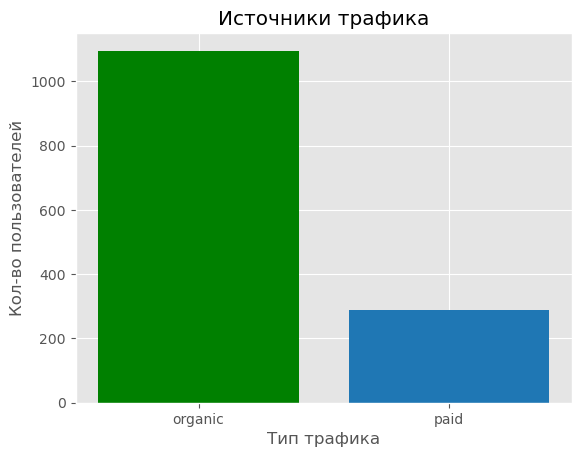

In [49]:
colors = ['green', 'tab:blue']
plt.figure()
plt.bar(traffic_sources.index, traffic_sources.values, color=['green', 'tab:blue'])
plt.title('Источники трафика')
plt.xlabel('Тип трафика')
plt.ylabel('Кол-во пользователей')
plt.show()

In [50]:
average_session_length = first_session.groupby('type_trafic')['length_session'].mean().reset_index()
average_session_length = average_session_length.rename(columns = {'length_session': 'avg_length_session'})
average_session_length

,type_trafic,avg_length_session
0,organic,96.559211
1,paid,101.607273


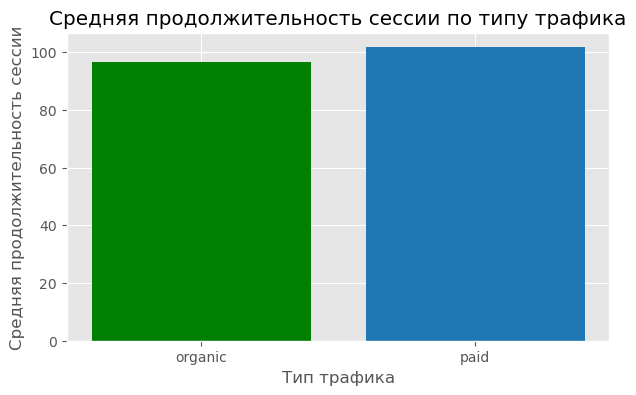

In [51]:
plt.figure(figsize=(7, 4))
plt.bar(average_session_length['type_trafic'], average_session_length['avg_length_session'], color=['green', 'tab:blue'])
plt.title('Средняя продолжительность сессии по типу трафика')
plt.xlabel('Тип трафика')
plt.ylabel('Средняя продолжительность сессии')
plt.show()

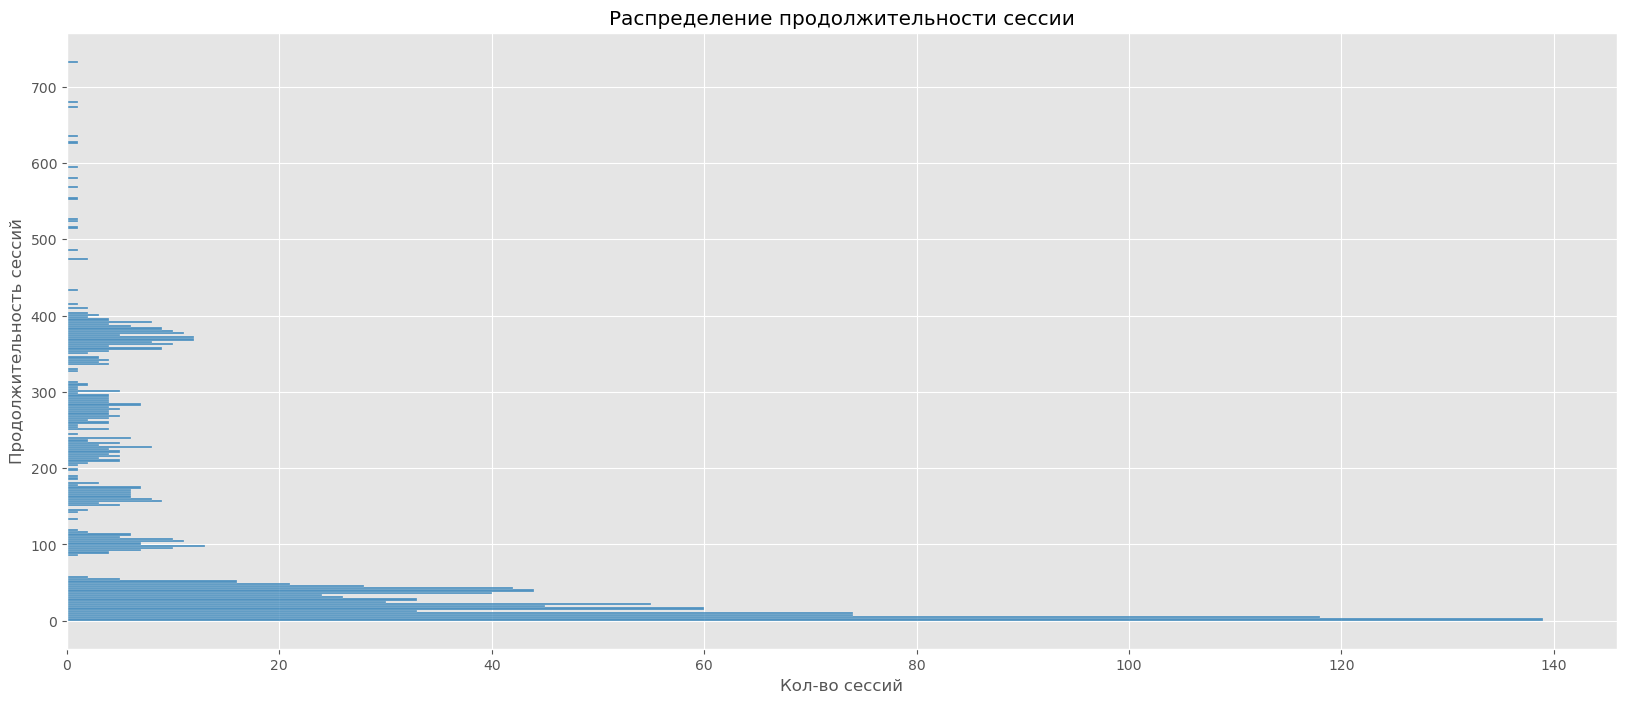

In [52]:
plt.figure(figsize=(20, 8))
sns.histplot(data=first_session, y='length_session', bins=250 , color = 'tab:blue') 

plt.title('Распределение продолжительности сессии')
plt.xlabel('Кол-во сессий')
plt.ylabel('Продолжительность сессий')
plt.show()

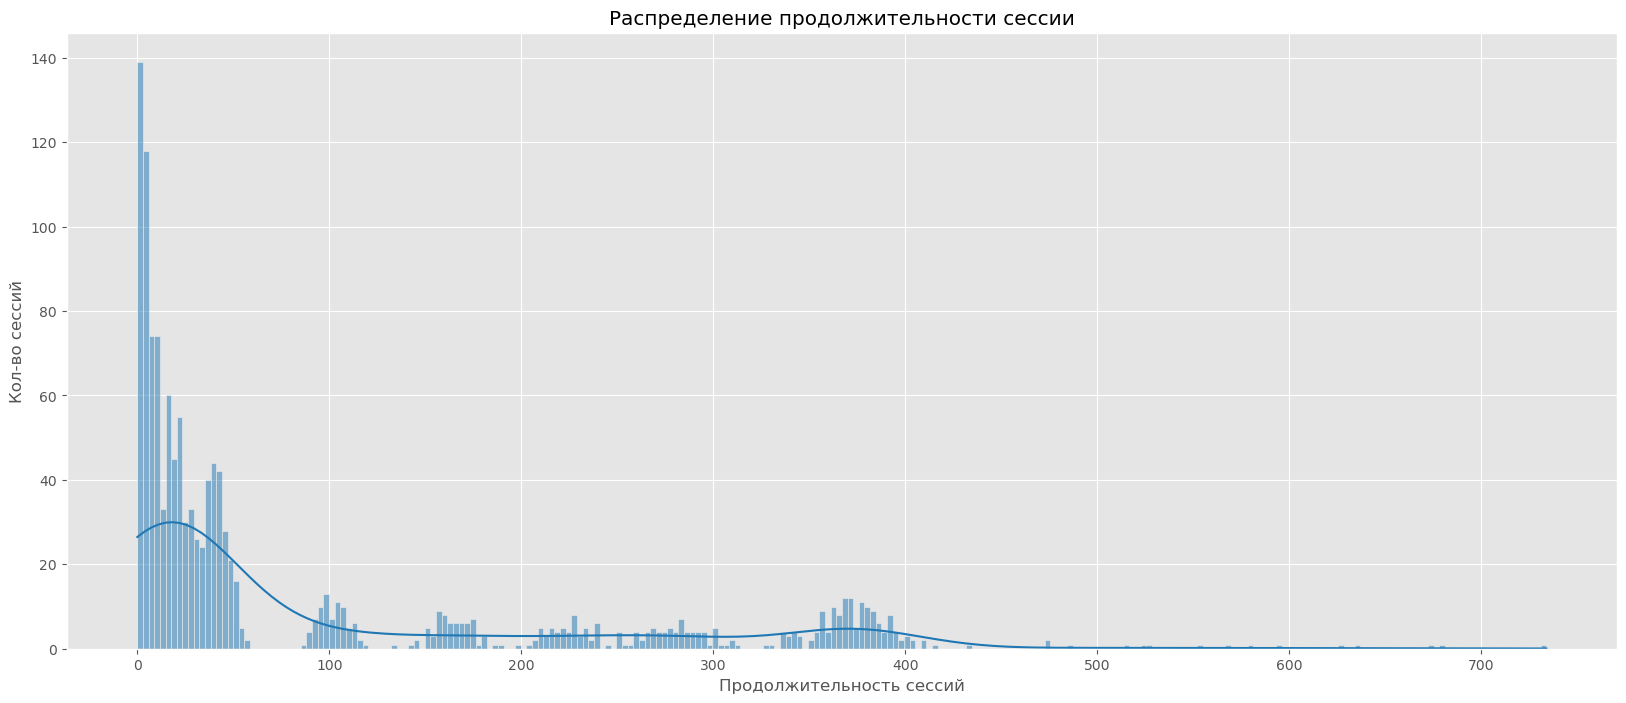

In [53]:
plt.figure(figsize=(20, 8))
sns.histplot(first_session['length_session'],  kde = True, bins = 250, color = 'tab:blue')
plt.title('Распределение продолжительности сессии')
plt.ylabel('Кол-во сессий')
plt.xlabel('Продолжительность сессий')
plt.show()

In [54]:
errors = first_session[first_session['error'] == 'error_window']
errors.head() 

,user_id,session_id,platform_type,type_trafic,time_start_session,time_finish_session,length_session,amount_get_level,amount_get_gold,amount_get_bronze_cup,amount_get_silver_cup,amount_get_gold_cup,level_cnt_tut,error,error_time,error_name,fps
2,1000007,a1000007GE1,android,organic,2023-02-01 08:51:00,2023-02-01 08:51:12,12.0,1,0.0,0,0,0,2,error_window,2023-02-01 08:51:12,network_error,24.0
4,1000011,a1000011CA1,android,organic,2023-02-01 09:22:37,2023-02-01 09:22:57,20.0,1,0.0,0,0,0,3,error_window,2023-02-01 09:22:57,klient_error,36.0
5,1000012,a1000012IT1,android,paid,2023-02-01 09:24:17,2023-02-01 09:24:41,24.0,1,0.0,0,0,0,5,error_window,2023-02-01 09:24:41,network_error,26.0
7,1000019,a1000019CA1,android,organic,2023-02-01 10:20:18,2023-02-01 10:20:51,33.0,1,0.0,0,0,0,4,error_window,2023-02-01 10:20:51,network_error,46.0
19,1000043,a1000043ES1,android,organic,2023-02-01 13:44:55,2023-02-01 13:45:01,6.0,1,0.0,0,0,0,1,error_window,2023-02-01 13:45:01,network_error,24.0


In [55]:
# Количество вернувшихся пользователей после ошибки
returned_users_errors = errors[errors['time_finish_session'] > errors['error_time']]
returned_users = returned_users_errors['user_id'].unique()
num_returned_users = len(returned_users)
print(f'Количество вернувшихся пользователей после ошибки: {num_returned_users}')

Количество вернувшихся пользователей после ошибки: 0


In [56]:
# Расчет кол-ва ошибок по уровням
errors_level = errors.groupby('level_cnt_tut')['error'].count().reset_index()
errors_level

,level_cnt_tut,error
0,0,12
1,1,41
2,2,31
3,3,46
4,4,30
5,5,36
6,6,29
7,7,17


In [57]:
# Кол-во ошибок
errors_level_sum = errors_level['error'].sum()
print(f'Количество ошибок: {errors_level_sum}')

Количество ошибок: 242


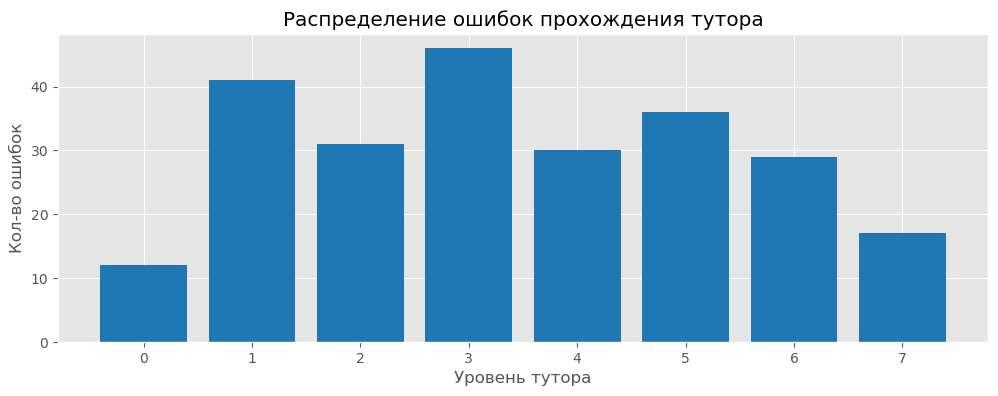

In [58]:
plt.figure(figsize=(12, 4))
plt.bar(errors_level['level_cnt_tut'], errors_level['error'], color = 'tab:blue')
plt.title('Распределение ошибок прохождения тутора')
plt.xlabel('Уровень тутора')
plt.ylabel('Кол-во ошибок')
plt.show()

In [59]:
# Структура ошибок 
errors_structure = errors.groupby('error_name')['error'].count().reset_index()
errors_structure = errors_structure.rename(columns = {'error': 'error_cnt'})
errors_structure

,error_name,error_cnt
0,klient_error,75
1,network_error,133
2,server_error,34


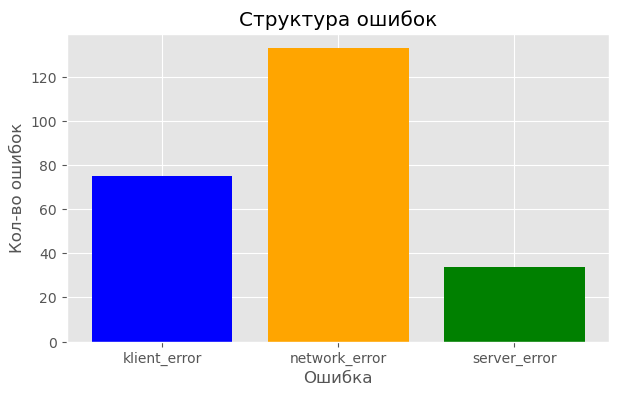

In [60]:
plt.figure(figsize=(7, 4))
plt.bar(errors_structure['error_name'], errors_structure['error_cnt'], color=['blue', 'orange', 'green'])
plt.title('Структура ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Кол-во ошибок')
plt.show()

In [61]:
# Расчет кол-ва ошибок по платформе
errors_structure_platform = errors.groupby('platform_type')['error'].count().reset_index()
errors_structure_platform = errors_structure_platform.rename(columns = {'error': 'error_cnt'})
errors_structure_platform

,platform_type,error_cnt
0,android,148
1,iOS,94


In [62]:
# Объединение структуры покупок по уровням
final_structure_error = errors.groupby(['level_cnt_tut', 'error_name']).size().unstack(fill_value=0)
final_structure_error

error_name,klient_error,network_error,server_error
level_cnt_tut,,,
0,3,7,2
1,13,24,4
2,11,19,1
3,18,19,9
4,10,18,2
5,11,19,6
6,5,19,5
7,4,8,5


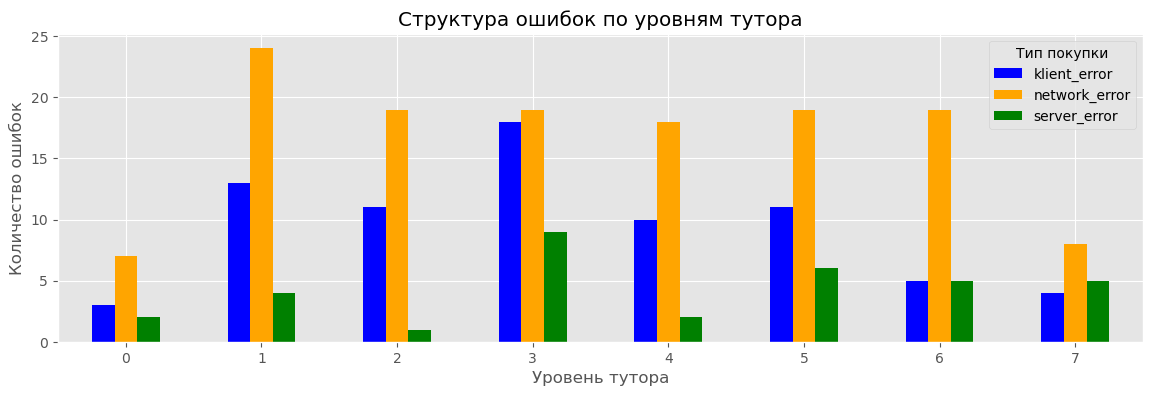

In [63]:
final_structure_error.plot(kind='bar', figsize=(14, 4), color=['blue', 'orange', 'green'])
plt.title('Структура ошибок по уровням тутора')
plt.xlabel('Уровень тутора')
plt.ylabel('Количество ошибок')
plt.legend(title='Тип покупки')
plt.xticks(rotation=0)
plt.show()

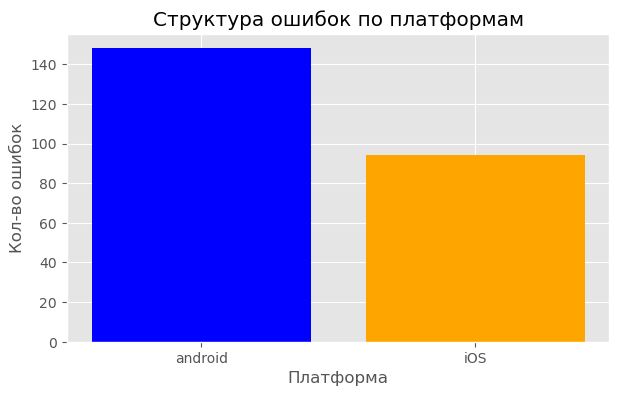

In [64]:
plt.figure(figsize=(7, 4))
plt.bar(errors_structure_platform['platform_type'], errors_structure_platform['error_cnt'], color=['blue', 'orange'])
plt.title('Структура ошибок по платформам')
plt.xlabel('Платформа')
plt.ylabel('Кол-во ошибок')
plt.show()

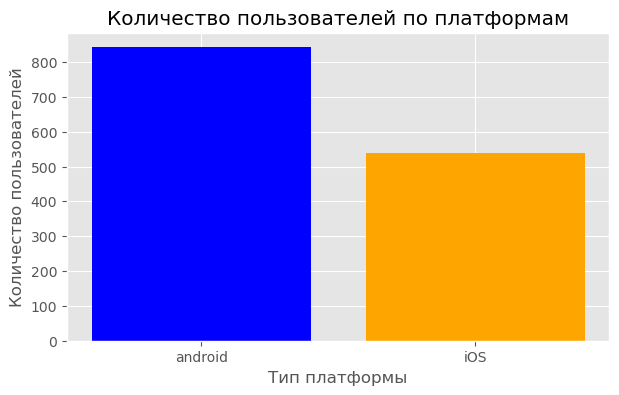

In [65]:
plt.figure(figsize=(7, 4))
plt.bar(user_by_platform['platform_type'], user_by_platform['user_id'], color=['blue', 'orange'])
plt.title('Количество пользователей по платформам')
plt.xlabel('Тип платформы')
plt.ylabel('Количество пользователей')
plt.show()

In [66]:
# Расчет fps по платформе
fps_structure_platform = first_session.groupby('platform_type')['fps'].mean().reset_index()
fps_structure_platform

,platform_type,fps
0,android,40.279097
1,iOS,40.168519


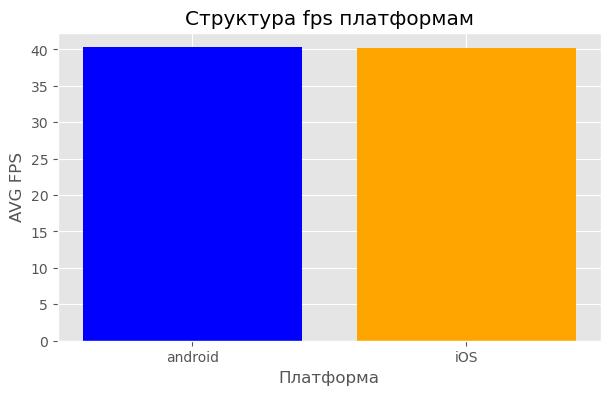

In [67]:
plt.figure(figsize=(7, 4))
plt.bar(fps_structure_platform['platform_type'], fps_structure_platform['fps'], color=['blue', 'orange'])
plt.title('Структура fps платформам')
plt.xlabel('Платформа')
plt.ylabel('AVG FPS')
plt.show()

In [68]:
# Расчет кол-ва ошибок по fps
errors_structure_fps = errors.groupby('fps')['error'].count().reset_index()

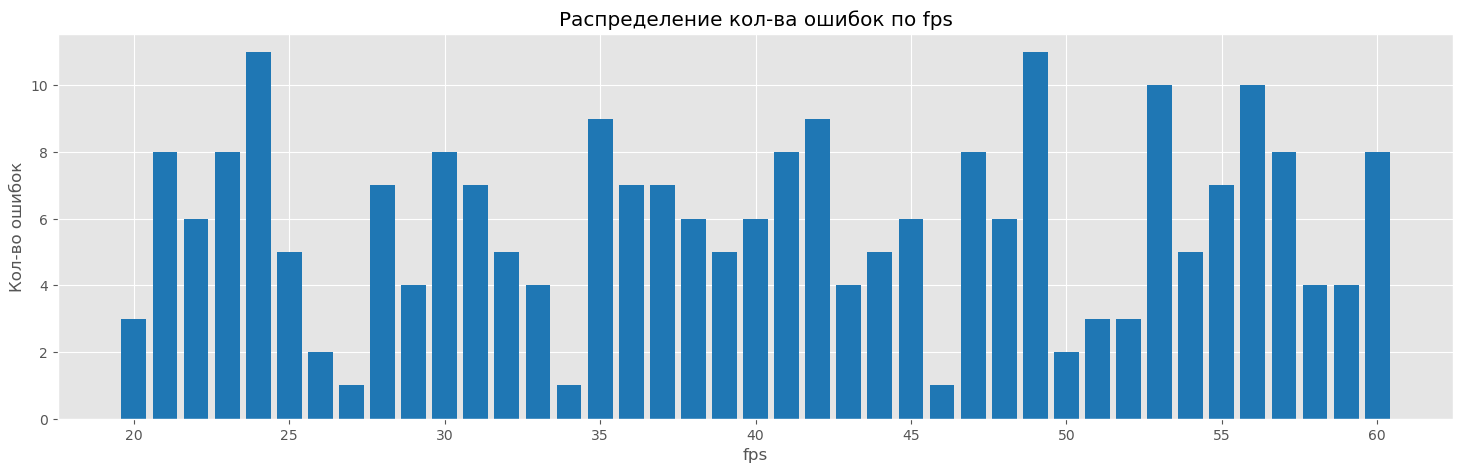

In [69]:
plt.figure(figsize=(18, 5))
plt.bar(errors_structure_fps['fps'], errors_structure_fps['error'], color = 'tab:blue')
plt.title('Распределение кол-ва ошибок по fps')
plt.xlabel('fps')
plt.ylabel('Кол-во ошибок')
plt.show()

In [70]:
# Расчет кол-ва ошибок по длинне сессии
errors_structure_lenght = errors.groupby('length_session')['error'].count().reset_index()

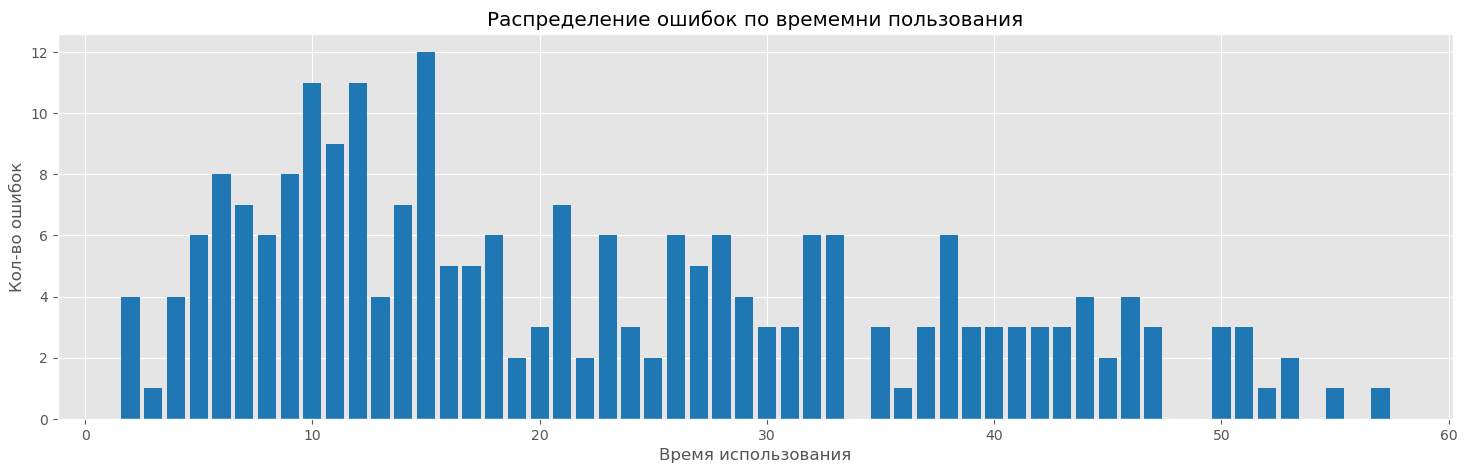

In [71]:
plt.figure(figsize=(18, 5))
plt.bar(errors_structure_lenght['length_session'], errors_structure_lenght['error'], color = 'tab:blue')
plt.title('Распределение ошибок по времемни пользования')
plt.xlabel('Время использования')
plt.ylabel('Кол-во ошибок')
plt.show()

## Воронки стартового тутора и воронка первой сессии 

In [72]:
funnel = df[['user_id', 'session_id', 'event_name', 'user_time', 'param_1', 'level', 'platform_type']]
funnel

,user_id,session_id,event_name,user_time,param_1,level,platform_type
0,1000001,a1000001ES1,app_install_start,2023-02-01 08:00:02,0.0,0,android
1,1000001,a1000001ES1,performance,2023-02-01 08:00:02,27.0,0,android
2,1000001,a1000001ES1,app_install_finish,2023-02-01 08:01:16,74.0,0,android
3,1000001,a1000001ES1,loading_finish,2023-02-01 08:01:42,26.0,0,android
4,1000001,a1000001ES1,tutorial_step_start,2023-02-01 08:01:42,1.0,0,android
...,...,...,...,...,...,...,...
30533,1002456,i1002456RU3,res_movement_outc,2023-02-17 10:15:57,3.0,11,iOS
30534,1002456,i1002456RU3,stage_start,2023-02-17 10:15:57,1.0,11,iOS
30535,1002456,i1002456RU3,stage_win,2023-02-17 10:16:56,1.0,11,iOS
30537,1002456,i1002456RU3,res_movement_inc,2023-02-17 10:16:56,500.0,12,iOS


In [73]:
# Воронка стартового тутора
loading_finish_users = funnel[funnel['event_name'] == 'loading_finish']['user_id'].nunique()
print(f"Кол-во пользователей запустивших приложение: {loading_finish_users}")

tutorial_step_start_users = funnel[funnel['event_name'] == 'tutorial_step_start']['user_id'].nunique()
print(f"Кол-во пользователей начавших тутор: {tutorial_step_start_users}")

tutorial_step_finish_users_1 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 1)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 1 уровень тутора: {tutorial_step_finish_users_1}")

tutorial_step_finish_users_2 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 2)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 2 уровень тутора: {tutorial_step_finish_users_2}")

tutorial_step_finish_users_3 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 3)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 3 уровень тутора: {tutorial_step_finish_users_3}")

tutorial_step_finish_users_4 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 4)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 4 уровень тутора: {tutorial_step_finish_users_4}")

tutorial_step_finish_users_5 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 5)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 5 уровень тутора: {tutorial_step_finish_users_5}")

tutorial_step_finish_users_6 = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 6)]['user_id'].nunique()
print(f"Кол-во пользователей прошедших 6 уровень тутора: {tutorial_step_finish_users_6}")

tutorial_step_finish_users = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 7)]['user_id'].nunique()
print(f"Кол-во пользователей закончивших тутор: {tutorial_step_finish_users}")

Кол-во пользователей запустивших приложение: 1339
Кол-во пользователей начавших тутор: 1339
Кол-во пользователей прошедших 1 уровень тутора: 1163
Кол-во пользователей прошедших 2 уровень тутора: 1030
Кол-во пользователей прошедших 3 уровень тутора: 882
Кол-во пользователей прошедших 4 уровень тутора: 765
Кол-во пользователей прошедших 5 уровень тутора: 659
Кол-во пользователей прошедших 6 уровень тутора: 580
Кол-во пользователей закончивших тутор: 498


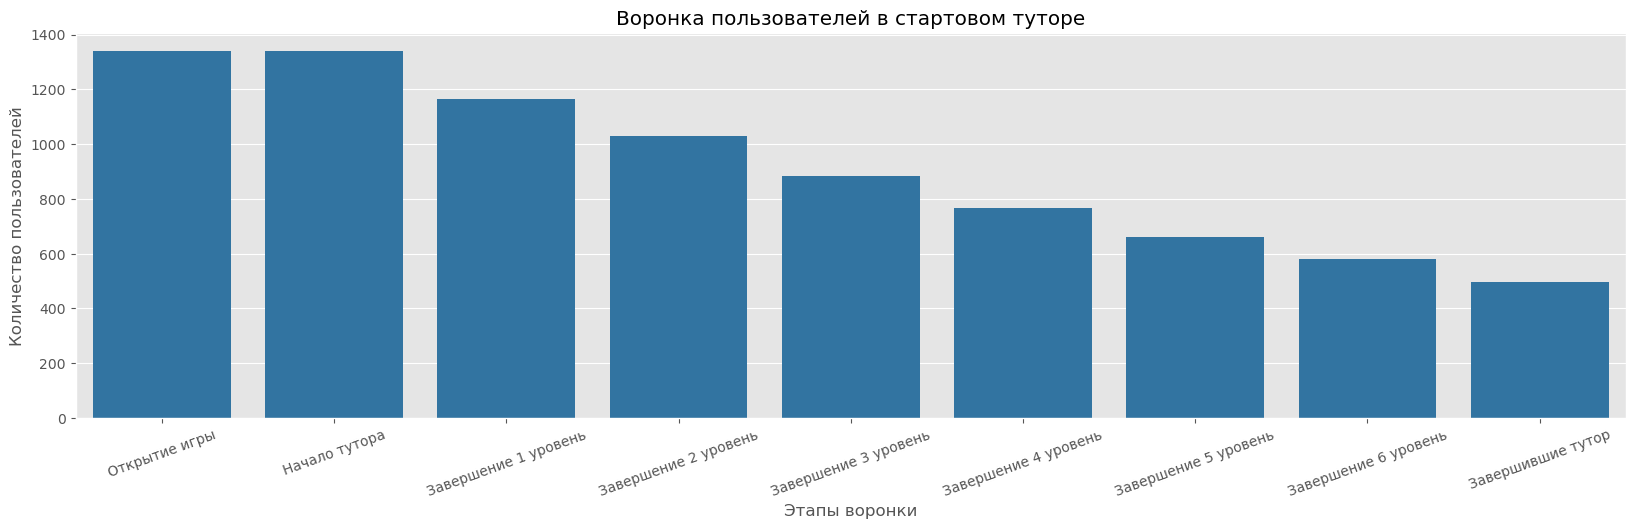

In [74]:
loading_finish_users = funnel[funnel['event_name'] == 'loading_finish']['user_id'].nunique()
tutorial_step_start_users = funnel[funnel['event_name'] == 'tutorial_step_start']['user_id'].nunique()
tutorial_steps = {
    'Завершение 1 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 1)]['user_id'].nunique(),
    'Завершение 2 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 2)]['user_id'].nunique(),
    'Завершение 3 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 3)]['user_id'].nunique(),
    'Завершение 4 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 4)]['user_id'].nunique(),
    'Завершение 5 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 5)]['user_id'].nunique(),
    'Завершение 6 уровень': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 6)]['user_id'].nunique(),
    'Завершившие тутор': funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 7)]['user_id'].nunique()
}

data = {
    'Этап': ['Открытие игры', 'Начало тутора'] + list(tutorial_steps.keys()),
    'Количество пользователей': [loading_finish_users, tutorial_step_start_users] + list(tutorial_steps.values())
}

df1 = pd.DataFrame(data)

plt.figure(figsize=(20, 5))
sns.barplot(x='Этап', y='Количество пользователей', data=df1, color = 'tab:blue')
plt.xlabel('Этапы воронки')
plt.ylabel('Количество пользователей')
plt.title('Воронка пользователей в стартовом туторе')
plt.xticks(rotation=20)
plt.show()

In [75]:
funnel_f = df[df['session_id'].astype(str).str.endswith('1')][['user_id', 'session_id', 'event_name', 'user_time', 'param_1', 'extra_1', 'level', 'platform_type']]
funnel_f

,user_id,session_id,event_name,user_time,param_1,extra_1,level,platform_type
0,1000001,a1000001ES1,app_install_start,2023-02-01 08:00:02,0.0,organic,0,android
1,1000001,a1000001ES1,performance,2023-02-01 08:00:02,27.0,samsung,0,android
2,1000001,a1000001ES1,app_install_finish,2023-02-01 08:01:16,74.0,NaN,0,android
3,1000001,a1000001ES1,loading_finish,2023-02-01 08:01:42,26.0,NaN,0,android
4,1000001,a1000001ES1,tutorial_step_start,2023-02-01 08:01:42,1.0,NaN,0,android
...,...,...,...,...,...,...,...,...
30958,1002498,a1002498RU1,stage_win,2023-02-15 17:36:35,4.0,bronze_loc,4,android
30961,1002498,a1002498RU1,res_movement_outc,2023-02-15 17:36:43,1.0,token,5,android
30962,1002498,a1002498RU1,stage_start,2023-02-15 17:36:43,5.0,bronze_loc,5,android
30963,1002498,a1002498RU1,stage_lesion,2023-02-15 17:38:00,5.0,bronze_loc,5,android


In [76]:
# Воронка первой сессии
loading_finish_users = funnel_f[funnel_f['event_name'] == 'loading_finish']['user_id'].nunique()
print(f"Кол-во пользователей запустивших приложение: {loading_finish_users}")

tutorial_step_start_users = funnel_f[funnel_f['event_name'] == 'tutorial_step_start']['user_id'].nunique()
print(f"Кол-во пользователей начавших тутор: {tutorial_step_start_users}")

tutorial_step_finish_users = funnel_f[(funnel_f['event_name'] == 'tutorial_step_finish') & (funnel_f['param_1'] == 7)]['user_id'].nunique()
print(f"Кол-во пользователей закончивших тутор: {tutorial_step_finish_users}")

lvl_1 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 1)]['user_id'].nunique()
print(f"Получение 1 уровня: {lvl_1}")

lvl_2 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 2)]['user_id'].nunique()
print(f"Получение 2 уровня: {lvl_2}")

lvl_3 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 3)]['user_id'].nunique()
print(f"Получение 3 уровня: {lvl_3}")

lvl_4 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 4)]['user_id'].nunique()
print(f"Получение 4 уровня: {lvl_4}")

lvl_5 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 5)]['user_id'].nunique()
print(f"Получение 5 уровня: {lvl_5}")

lvl_6 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 6)]['user_id'].nunique()
print(f"Получение 6 уровня: {lvl_6}")

lvl_7 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 7)]['user_id'].nunique()
print(f"Получение 7 уровня: {lvl_7}")

lvl_8 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 8)]['user_id'].nunique()
print(f"Получение 8 уровня: {lvl_8}")

lvl_9 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 9)]['user_id'].nunique()
print(f"Получение 9 уровня: {lvl_9}")

lvl_10 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 10)]['user_id'].nunique()
print(f"Получение 10 уровня: {lvl_10}")

lvl_11 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 11)]['user_id'].nunique()
print(f"Получение 11 уровня: {lvl_11}")

lvl_12 = funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 12)]['user_id'].nunique()
print(f"Получение 12 уровня: {lvl_12}")

Кол-во пользователей запустивших приложение: 1339
Кол-во пользователей начавших тутор: 1339
Кол-во пользователей закончивших тутор: 498
Получение 1 уровня: 498
Получение 2 уровня: 423
Получение 3 уровня: 326
Получение 4 уровня: 254
Получение 5 уровня: 144
Получение 6 уровня: 117
Получение 7 уровня: 0
Получение 8 уровня: 0
Получение 9 уровня: 0
Получение 10 уровня: 0
Получение 11 уровня: 0
Получение 12 уровня: 0


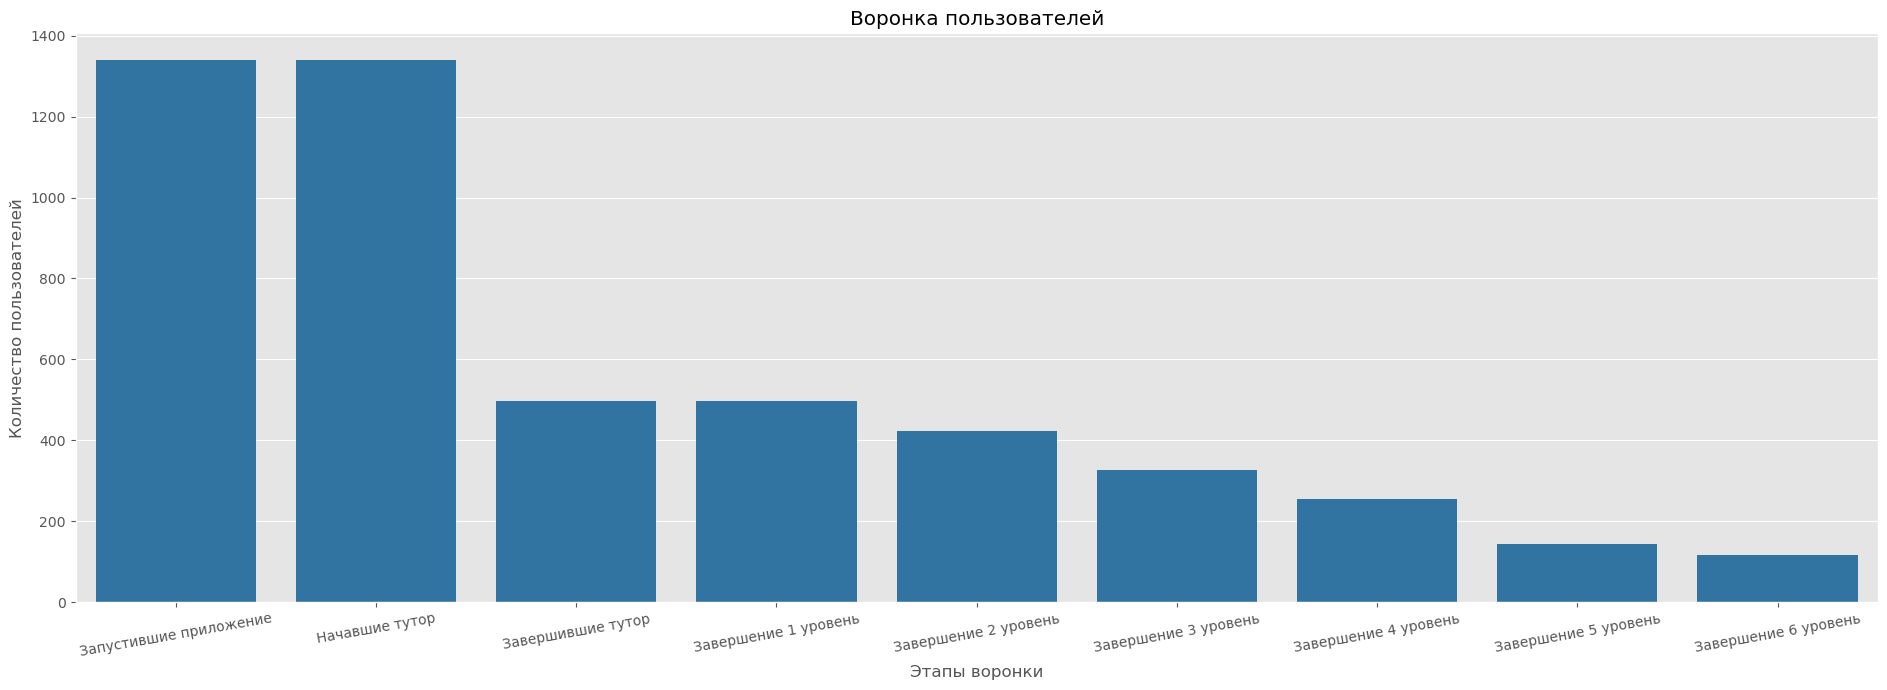

In [77]:
loading_finish_users = funnel_f[funnel_f['event_name'] == 'loading_finish']['user_id'].nunique()
tutorial_step_start_users = funnel_f[funnel_f['event_name'] == 'tutorial_step_start']['user_id'].nunique()
tutorial_step_finish_users = funnel_f[(funnel_f['event_name'] == 'tutorial_step_finish') & (funnel_f['param_1'] == 7)]['user_id'].nunique()

lvl_users = {
        'Завершение 1 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 1)]['user_id'].nunique(),
        'Завершение 2 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 2)]['user_id'].nunique(),
        'Завершение 3 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 3)]['user_id'].nunique(),
        'Завершение 4 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 4)]['user_id'].nunique(),
        'Завершение 5 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 5)]['user_id'].nunique(),
        'Завершение 6 уровень': funnel_f[(funnel_f['event_name'] == 'lvl_up') & (funnel_f['level'] == 6)]['user_id'].nunique()
}

data = {
    'Этап': [
        'Запустившие приложение',
        'Начавшие тутор',
        'Завершившие тутор',
    ] + list(lvl_users.keys()),
    'Количество пользователей': [
        loading_finish_users,
        tutorial_step_start_users,
        tutorial_step_finish_users,
    ] + list(lvl_users.values())
}

df2 = pd.DataFrame(data)

# Построение графика с использованием Seaborn
plt.figure(figsize=(19, 7))
sns.barplot(x='Этап', y='Количество пользователей', data=df2, color = 'tab:blue')
plt.xlabel('Этапы воронки')
plt.ylabel('Количество пользователей')
plt.title('Воронка пользователей')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [78]:
loading_finish_users_android = funnel[(funnel['event_name'] == 'loading_finish') & (funnel['platform_type'] == 'android')]['user_id'].nunique()
print(f"Кол-во пользователей запустивших приложение: {loading_finish_users_android}")

tutorial_step_start_users_android = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 1) & (funnel['platform_type'] == 'android')]['user_id'].nunique()
print(f"Кол-во пользователей начавших тутор на android: {tutorial_step_start_users_android}")

tutorial_step_finish_users_android = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 7) & (funnel['platform_type'] == 'android')]['user_id'].nunique()
print(f"Кол-во пользователей закончивших тутор на android: {tutorial_step_finish_users_android}")


loading_finish_users_ios = funnel[(funnel['event_name'] == 'loading_finish') & (funnel['platform_type'] == 'iOS')]['user_id'].nunique()
print(f"Кол-во пользователей запустивших приложение: {loading_finish_users_ios}")

tutorial_step_start_users_ios = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 1) & (funnel['platform_type'] == 'iOS')]['user_id'].nunique()
print(f"Кол-во пользователей начавших тутор на ios: {tutorial_step_start_users_ios}")

tutorial_step_finish_users_ios = funnel[(funnel['event_name'] == 'tutorial_step_finish') & (funnel['param_1'] == 7) & (funnel['platform_type'] == 'iOS')]['user_id'].nunique()
print(f"Кол-во пользователей закончивших тутор на ios: {tutorial_step_finish_users_ios}")

Кол-во пользователей запустивших приложение: 811
Кол-во пользователей начавших тутор на android: 701
Кол-во пользователей закончивших тутор на android: 290
Кол-во пользователей запустивших приложение: 528
Кол-во пользователей начавших тутор на ios: 462
Кол-во пользователей закончивших тутор на ios: 208


In [79]:
tutor_session = df.groupby('session_id').agg(
    user_id = ('user_id', 'first'),
    time_start_1 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 1)].min()), 
    time_start_2 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 2)].min()), 
    time_start_3 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 3)].min()),
    time_start_4 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 4)].min()),
    time_start_5 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 5)].min()),
    time_start_6 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 6)].min()),
    time_start_7 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_start') & (df.loc[x.index, 'param_1'] == 7)].min()),
    time_finish_7 = ('user_time', lambda x: x[(df.loc[x.index, 'event_name'] == 'tutorial_step_finish') & (df.loc[x.index, 'param_1'] == 7)].min())
    ).reset_index()
tutor_session

,session_id,user_id,time_start_1,time_start_2,time_start_3,time_start_4,time_start_5,time_start_6,time_start_7,time_finish_7
0,a1000001ES1,1000001,2023-02-01 08:01:42,2023-02-01 08:01:46,2023-02-01 08:01:48,2023-02-01 08:01:56,2023-02-01 08:02:05,NaT,NaT,NaT
1,a1000004RU1,1000004,2023-02-01 08:30:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,a1000007GE1,1000007,2023-02-01 08:51:00,2023-02-01 08:51:04,NaT,NaT,NaT,NaT,NaT,NaT
3,a1000009LT1,1000009,2023-02-01 09:10:25,2023-02-01 09:10:30,2023-02-01 09:10:36,NaT,NaT,NaT,NaT,NaT
4,a1000011CA1,1000011,2023-02-01 09:22:37,2023-02-01 09:22:40,2023-02-01 09:22:45,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
1561,i1002464GE1,1002464,2023-02-15 12:42:56,2023-02-15 12:42:59,2023-02-15 12:43:03,NaT,NaT,NaT,NaT,NaT
1562,i1002465RU1,1002465,2023-02-15 12:56:48,2023-02-15 12:56:53,2023-02-15 12:56:58,2023-02-15 12:57:04,2023-02-15 12:57:10,2023-02-15 12:57:16,2023-02-15 12:57:25,2023-02-15 12:57:32
1563,i1002466DE1,1002466,2023-02-15 12:59:09,2023-02-15 12:59:14,2023-02-15 12:59:18,NaT,NaT,NaT,NaT,NaT
1564,i1002479CA1,1002479,2023-02-15 14:47:35,2023-02-15 14:47:38,NaT,NaT,NaT,NaT,NaT,NaT


In [80]:
tutor_session['session_1'] = (tutor_session['time_start_2'] - tutor_session['time_start_1']).dt.total_seconds()
tutor_session['session_2'] = (tutor_session['time_start_3'] - tutor_session['time_start_2']).dt.total_seconds()
tutor_session['session_3'] = (tutor_session['time_start_4'] - tutor_session['time_start_3']).dt.total_seconds()
tutor_session['session_4'] = (tutor_session['time_start_5'] - tutor_session['time_start_4']).dt.total_seconds()
tutor_session['session_5'] = (tutor_session['time_start_6'] - tutor_session['time_start_5']).dt.total_seconds()
tutor_session['session_6'] = (tutor_session['time_start_7'] - tutor_session['time_start_6']).dt.total_seconds()
tutor_session['session_7'] = (tutor_session['time_finish_7'] - tutor_session['time_start_7']).dt.total_seconds()
tutor_session['session'] = (tutor_session['time_finish_7'] - tutor_session['time_start_1']).dt.total_seconds()
tutor_session

,session_id,user_id,time_start_1,time_start_2,time_start_3,time_start_4,time_start_5,time_start_6,time_start_7,time_finish_7,session_1,session_2,session_3,session_4,session_5,session_6,session_7,session
0,a1000001ES1,1000001,2023-02-01 08:01:42,2023-02-01 08:01:46,2023-02-01 08:01:48,2023-02-01 08:01:56,2023-02-01 08:02:05,NaT,NaT,NaT,4.0,2.0,8.0,9.0,NaN,NaN,NaN,NaN
1,a1000004RU1,1000004,2023-02-01 08:30:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a1000007GE1,1000007,2023-02-01 08:51:00,2023-02-01 08:51:04,NaT,NaT,NaT,NaT,NaT,NaT,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a1000009LT1,1000009,2023-02-01 09:10:25,2023-02-01 09:10:30,2023-02-01 09:10:36,NaT,NaT,NaT,NaT,NaT,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,a1000011CA1,1000011,2023-02-01 09:22:37,2023-02-01 09:22:40,2023-02-01 09:22:45,NaT,NaT,NaT,NaT,NaT,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,i1002464GE1,1002464,2023-02-15 12:42:56,2023-02-15 12:42:59,2023-02-15 12:43:03,NaT,NaT,NaT,NaT,NaT,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1562,i1002465RU1,1002465,2023-02-15 12:56:48,2023-02-15 12:56:53,2023-02-15 12:56:58,2023-02-15 12:57:04,2023-02-15 12:57:10,2023-02-15 12:57:16,2023-02-15 12:57:25,2023-02-15 12:57:32,5.0,5.0,6.0,6.0,6.0,9.0,7.0,44.0
1563,i1002466DE1,1002466,2023-02-15 12:59:09,2023-02-15 12:59:14,2023-02-15 12:59:18,NaT,NaT,NaT,NaT,NaT,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1564,i1002479CA1,1002479,2023-02-15 14:47:35,2023-02-15 14:47:38,NaT,NaT,NaT,NaT,NaT,NaT,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
avg_ses = tutor_session[['session_1', 'session_2', 'session_3', 'session_4', 'session_5', 'session_6', 'session_7']].mean()
avg_ses

session_1    4.433362
session_2    4.276699
session_3    7.569161
session_4    7.614379
session_5    7.827011
session_6    8.725862
session_7    5.447791
dtype: float64

In [82]:
overall_avg = tutor_session['session'].mean()
print(f'Среднее время прохождения тутора: {overall_avg:.2f} сек')

Среднее время прохождения тутора: 45.55 сек


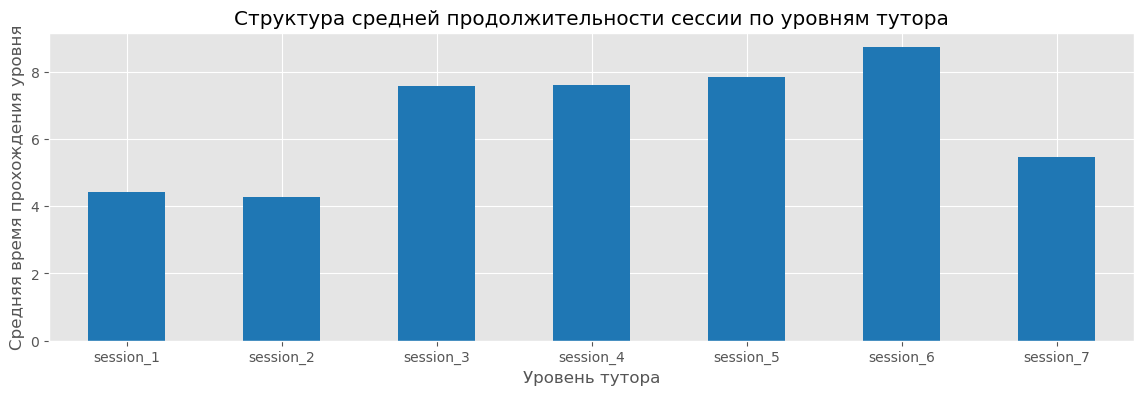

In [83]:
avg_ses.plot(kind='bar', figsize=(14, 4), color = 'tab:blue')
plt.title('Структура средней продолжительности сессии по уровням тутора')
plt.xlabel('Уровень тутора')
plt.ylabel('Средняя время прохождения уровня')
plt.xticks(rotation=0)
plt.show()

## A/B тест 
### Необходимо сделать вывод стоит ли заменить стартовый тутор новым (тест проходил с 01.02.2023 по 07.02.2023, группа А юзера чьи user_id – четные, группа В юзера чьи user_id – нечетные).

In [87]:
from scipy import stats
# Фильтрация данных по дате
user_session['time_start_session'] = pd.to_datetime(user_session['time_start_session'])
user_session = user_session[(user_session['time_start_session'] >= '2023-02-01') & (user_session['time_start_session'] <= '2023-02-07')]

# Определение групп A и B
user_session['group'] = np.where(user_session['user_id'] % 2 == 0, 'A', 'B')

# Анализ метрики: средняя продолжительность сессии
grouped_means = user_session.groupby('group')['length_session'].mean()
print(f'Средняя продолжительность сессий группы A: {grouped_means["A"]:.2f} сек')
print(f'Средняя продолжительность сессий группы B: {grouped_means["B"]:.2f} сек')

# t-тест
t_stat, p_value = stats.ttest_ind(user_session[user_session['group'] == 'A']['length_session'],
                                   user_session[user_session['group'] == 'B']['length_session'])
print(f't-статистика: {t_stat:.2f}, p-значение: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Существует статистически значимая разница между группами.")
else:
    print("Статистически значимая разница между группами отсутствует.")


Средняя продолжительность сессий группы A: 132.94 сек
Средняя продолжительность сессий группы B: 119.45 сек
t-статистика: 1.02, p-значение: 0.3099
Статистически значимая разница между группами отсутствует.


In [86]:
# Фильтрация данных по дате
user_session['time_start_session'] = pd.to_datetime(user_session['time_start_session'])
user_session = user_session[(user_session['time_start_session'] >= '2023-02-01') & (user_session['time_start_session'] <= '2023-02-07')]

# Определение групп A и B
user_session['group'] = np.where(user_session['user_id'] % 2 == 0, 'A', 'B')

# Анализ метрики: среднее количество полученных уровней
grouped_means = user_session.groupby('group')['amount_get_level'].mean()
print(f'Среднее количество полученных уровней группы A: {grouped_means["A"]:.2f}')
print(f'Среднее количество полученных уровней группы B: {grouped_means["B"]:.2f}')

# t-тест
t_stat, p_value = stats.ttest_ind(user_session[user_session['group'] == 'A']['amount_get_level'],
                                   user_session[user_session['group'] == 'B']['amount_get_level'])
print(f't-статистика: {t_stat:.2f}, p-значение: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("Существует статистически значимая разница между группами.")
else:
    print("Статистически значимая разница между группами отсутствует.")

Среднее количество полученных уровней группы A: 2.60
Среднее количество полученных уровней группы B: 2.44
t-статистика: 0.98, p-значение: 0.3294
Статистически значимая разница между группами отсутствует.
